In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

from utils import load_flights, generate_charts
from utils.eda import save_fig, finish
from utils.generate_charts import REQUIRE

sns.set_style("whitegrid")
warnings.simplefilter(action="ignore")
np.random.seed(42)

# Example EDA for 2008 year

In [2]:
flights = load_flights(["2008"])

In [3]:
flights.memory_usage()

Index                     128
Year                 19113736
Month                19113736
DayofMonth           19113736
DayOfWeek            19113736
DepTime              19113736
CRSDepTime           19113736
ArrTime              19113736
CRSArrTime           19113736
UniqueCarrier        19113736
FlightNum            19113736
TailNum              19113736
ActualElapsedTime    19113736
CRSElapsedTime       19113736
AirTime              19113736
ArrDelay             19113736
DepDelay             19113736
Origin               19113736
Dest                 19113736
Distance             19113736
TaxiIn               19113736
TaxiOut              19113736
Cancelled            19113736
CancellationCode     19113736
Diverted             19113736
CarrierDelay         19113736
WeatherDelay         19113736
NASDelay             19113736
SecurityDelay        19113736
LateAircraftDelay    19113736
dtype: int64

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [5]:
flights.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2389217.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,2389217.0,2.505009,1.121493,1.0,1.0,3.0,4.0,4.0
DayofMonth,2389217.0,15.663856,8.750405,1.0,8.0,16.0,23.0,31.0
DayOfWeek,2389217.0,3.909625,1.980431,1.0,2.0,4.0,6.0,7.0
DepTime,2324775.0,1340.018182,480.271718,1.0,930.0,1330.0,1733.0,2400.0
CRSDepTime,2389217.0,1329.992314,465.783275,0.0,927.0,1325.0,1720.0,2359.0
ArrTime,2319121.0,1485.835066,508.129478,1.0,1110.0,1516.0,1914.0,2400.0
CRSArrTime,2389217.0,1496.743989,484.523759,1.0,1115.0,1520.0,1910.0,2400.0
FlightNum,2389217.0,2213.887980,1951.392101,1.0,605.0,1544.0,3631.0,9741.0
ActualElapsedTime,2319121.0,128.618883,70.253033,14.0,78.0,111.0,160.0,905.0


In [6]:
flights.isna().sum(axis=0)

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                64442
CRSDepTime                 0
ArrTime                70096
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                42452
ActualElapsedTime      70096
CRSElapsedTime           407
AirTime                70096
ArrDelay               70096
DepDelay               64442
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 70096
TaxiOut                64442
Cancelled                  0
CancellationCode     2324775
Diverted                   0
CarrierDelay         1804634
WeatherDelay         1804634
NASDelay             1804634
SecurityDelay        1804634
LateAircraftDelay    1804634
dtype: int64

In [7]:
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [8]:
flights = load_flights(["2008"], cols=REQUIRE)
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   UniqueCarrier     object 
 1   CRSElapsedTime    float64
 2   DepDelay          float64
 3   ArrDelay          float64
 4   TailNum           object 
 5   Cancelled         int64  
 6   CancellationCode  object 
 7   Year              int64  
 8   Month             int64  
 9   DayofMonth        int64  
 10  DayOfWeek         int64  
 11  Origin            object 
 12  Dest              object 
 13  DepTime           float64
 14  ArrTime           float64
dtypes: float64(5), int64(5), object(5)
memory usage: 273.4+ MB


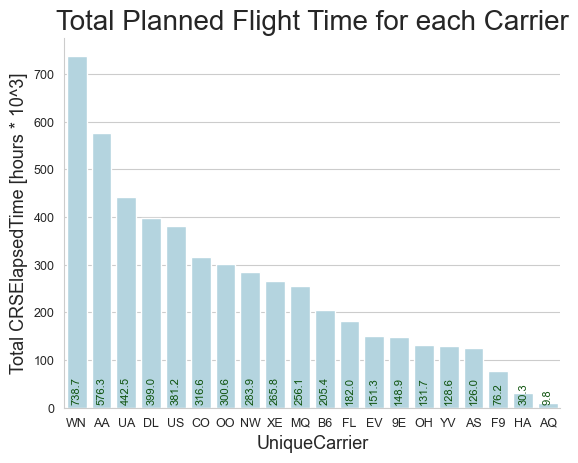

In [9]:
title = "Total Planned Flight Time for each Carrier"

dt = flights.groupby("UniqueCarrier")["CRSElapsedTime"].sum()
dt = np.c_[dt.index, dt / (60 * 1000)]
dt = pd.DataFrame(dt, columns=["UniqueCarrier", "Total CRSElapsedTime [hours * 10^3]"])
dt = dt.sort_values(
    by="Total CRSElapsedTime [hours * 10^3]", axis=0, ascending=False
).reset_index()

ax = sns.barplot(
    dt, x="UniqueCarrier", y="Total CRSElapsedTime [hours * 10^3]", color="lightblue"
)
for i in range(len(dt)):
    ax.text(
        i,
        10,
        round(dt.loc[i, "Total CRSElapsedTime [hours * 10^3]"], 1),
        color="#0f540f",
        ha="center",
        rotation=90,
        size=8,
    )

finish(ax, title)

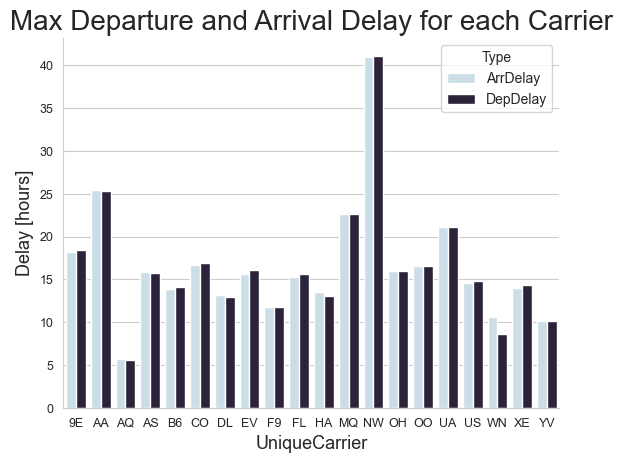

In [10]:
title = "Max Departure and Arrival Delay for each Carrier"

dt = flights.groupby("UniqueCarrier")[["DepDelay", "ArrDelay"]].max()
dt_DepDelay = np.c_[dt.index, dt["DepDelay"] / 60, np.full(dt.index.shape, "DepDelay")]
dt_ArrDelay = np.c_[dt.index, dt["ArrDelay"] / 60, np.full(dt.index.shape, "ArrDelay")]
dt = np.r_[dt_ArrDelay, dt_DepDelay]
dt = pd.DataFrame(dt, columns=["UniqueCarrier", "Delay [hours]", "Type"])

ax = sns.barplot(
    dt,
    x="UniqueCarrier",
    y="Delay [hours]",
    hue="Type",
    palette=sns.color_palette("ch:s=.25,rot=-.25", 2),
)

finish(ax, title)

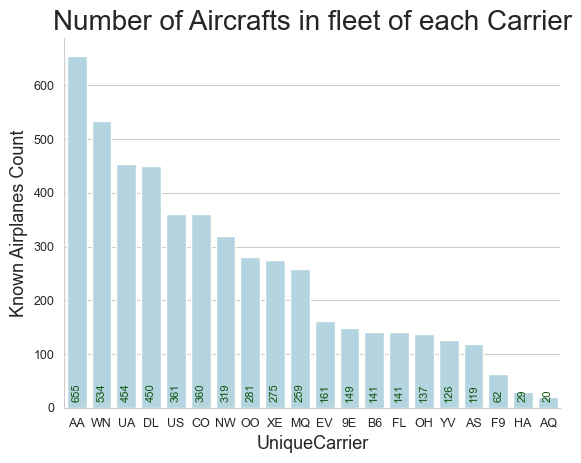

In [11]:
title = "Number of Aircrafts in fleet of each Carrier"

dt1 = flights.groupby(["UniqueCarrier"])["TailNum"].unique()
dt2 = [len(dt1[i][~pd.isna(dt1[i])]) for i in range(len(dt1))]
dt = np.c_[dt1.index, dt2]
dt = pd.DataFrame(dt, columns=["UniqueCarrier", "Known Airplanes Count"])
dt = dt.sort_values(by="Known Airplanes Count", axis=0, ascending=False).reset_index()

ax = sns.barplot(dt, x="UniqueCarrier", y="Known Airplanes Count", color="lightblue")
for i in range(len(dt)):
    ax.text(
        i,
        15,
        round(dt.loc[i, "Known Airplanes Count"], 1),
        color="#0f540f",
        ha="center",
        rotation=90,
        size=8,
    )

finish(ax, title)

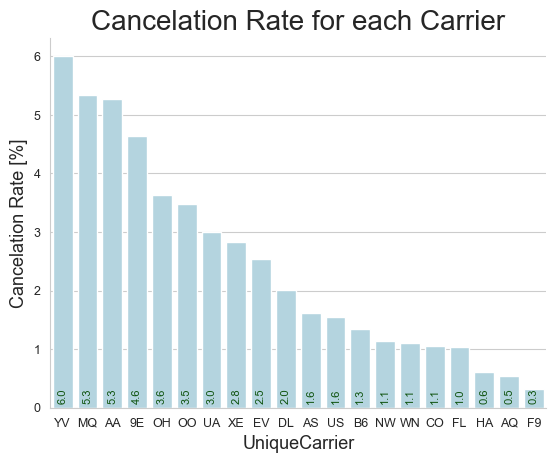

In [12]:
title = "Cancelation Rate for each Carrier"

dt1 = (
    flights[~(flights["Cancelled"] == 0)]
    .groupby(["UniqueCarrier"])["Cancelled"]
    .count()
)
dt2 = (
    flights[~(flights["Cancelled"].isna())]
    .groupby(["UniqueCarrier"])["Cancelled"]
    .count()
)
dt = np.c_[dt1.index, dt1, dt2, dt1 / dt2 * 100]
dt = pd.DataFrame(
    dt,
    columns=[
        "UniqueCarrier",
        "Cancelled flights",
        "All flights",
        "Cancelation Rate [%]",
    ],
)
dt = dt.sort_values(by="Cancelation Rate [%]", axis=0, ascending=False).reset_index()

ax = sns.barplot(dt, x="UniqueCarrier", y="Cancelation Rate [%]", color="lightblue")
for i in range(len(dt)):
    ax.text(
        i,
        0.1,
        round(dt.loc[i, "Cancelation Rate [%]"], 1),
        color="#0f540f",
        ha="center",
        rotation=90,
        size=8,
    )

finish(ax, title)

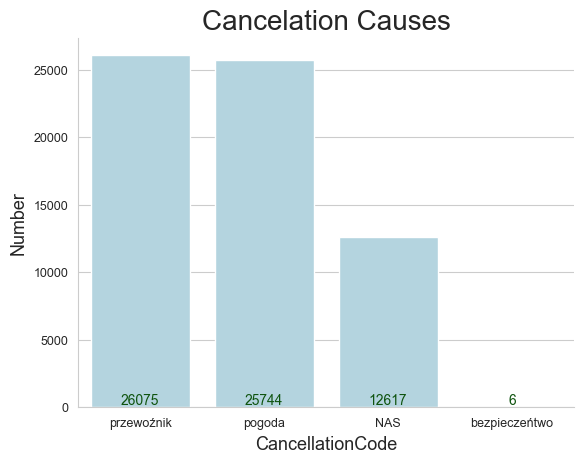

In [13]:
title = "Cancelation Causes"

dt = (
    flights[~(flights["Cancelled"] == 0)]
    .groupby(["CancellationCode"])["CancellationCode"]
    .count()
)
dt.name = "Number"
dt = pd.DataFrame(dt).reset_index()

ax = sns.barplot(dt, x="CancellationCode", y="Number", color="lightblue")
for i in range(len(dt)):
    ax.text(
        i, 200, round(dt.loc[i, "Number"], 1), color="#0f540f", ha="center", size=10
    )

# plt.xticks(rotation=90)
plt.xticks([0, 1, 2, 3], ["przewoźnik", "pogoda", "NAS", "bezpieczeńtwo"])
finish(ax, title)

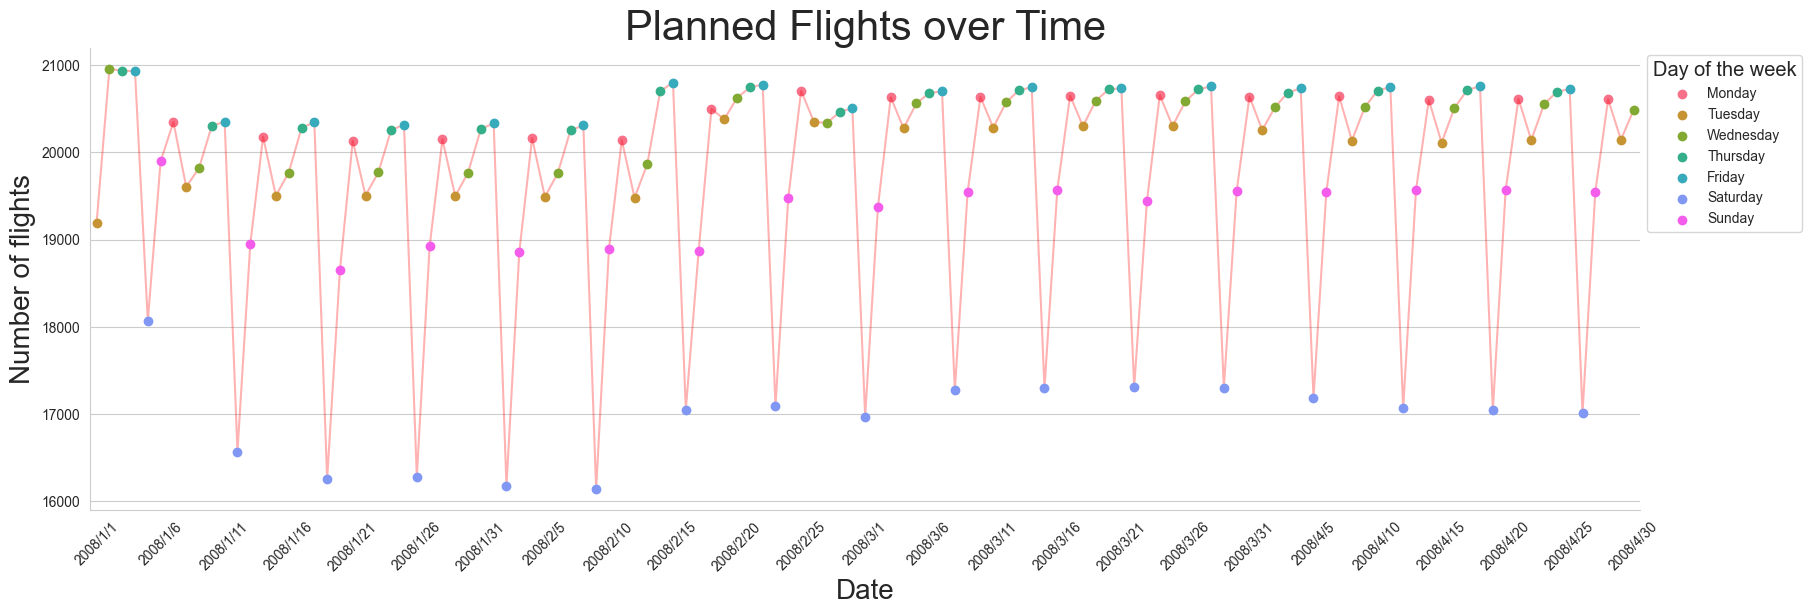

In [14]:
title = "Planned Flights over Time"

labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
bins = [0, 1, 2, 3, 4, 5, 6, np.inf]

dt = flights.groupby(["Year", "Month", "DayofMonth", "DayOfWeek"])["DayOfWeek"].count()
dt.name = "Number of flights"
dt = pd.DataFrame(dt).reset_index()
dt["Date"] = (
    dt["Year"].astype(str)
    + "/"
    + dt["Month"].astype(str)
    + "/"
    + dt["DayofMonth"].astype(str)
)
dt["DayOfWeek"] = pd.cut(dt["DayOfWeek"], bins, labels=labels)

plt.figure(figsize=(20, 6))
ax = sns.lineplot(dt, x="Date", y="Number of flights", color="red", alpha=0.3)
ax = sns.pointplot(
    dt,
    x="Date",
    y="Number of flights",
    hue="DayOfWeek",
    scale=0.8,
    palette=sns.color_palette("husl", 7),
)
# ax = sns.barplot(dt, x="Date", y="Number of flights", color="lightblue")
i = 4
for label in ax.xaxis.get_ticklabels():
    i += 1
    if i == 5:
        i = 0
        continue
    label.set_visible(False)


lgd = plt.legend(
    loc="upper left",
    bbox_to_anchor=(1, 1),
    title="Day of the week",
    title_fontsize="x-large",
)
plt.xticks(rotation=45)
sns.despine()
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.title(title, size=30)
save_fig(title)
plt.show()

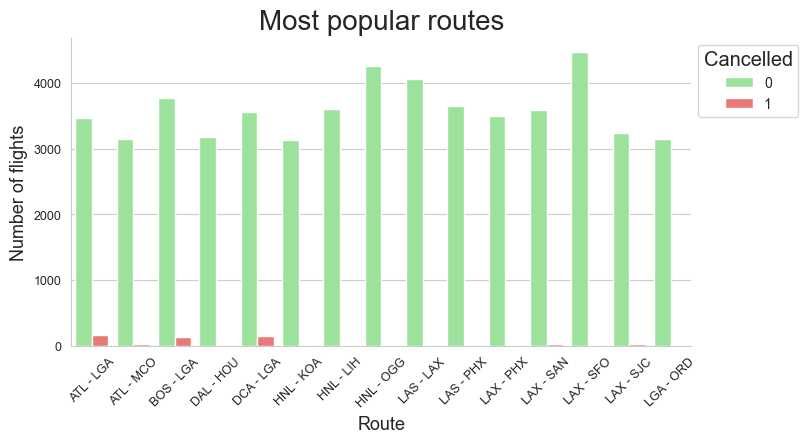

In [15]:
title = "Most popular routes"

dt = flights.groupby(["Origin", "Dest", "Cancelled"])["TailNum"].count().reset_index()

# treat flights from ABE to ATL and from ATL to ABE as same route
dt1 = dt[dt["Origin"] < dt["Dest"]]
dt2 = dt[dt["Origin"] > dt["Dest"]]
assert len(dt1) + len(dt2) == len(dt)
dt2 = dt2.rename(
    columns={"Origin": "Dest", "Dest": "Origin", "TailNum": "Number of flights"}
)
dt = pd.concat([dt1, dt2])
dt["Route"] = dt["Origin"] + " - " + dt["Dest"]

dt1 = dt.groupby(["Route", "Cancelled"])["Number of flights"].sum().reset_index()
dt2 = (
    dt1.groupby(["Route"])["Number of flights"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()[:15]
)
keep = dt1["Route"].isin(dt2["Route"])
dt = dt1[keep].reset_index()

plt.figure(figsize=(8, 4))
ax = sns.barplot(
    dt,
    x="Route",
    y="Number of flights",
    hue="Cancelled",
    palette=["lightgreen", "#fa6666"],
)

plt.legend(
    loc="upper left", bbox_to_anchor=(1, 1), title_fontsize="x-large", title="Cancelled"
)
plt.xticks(rotation=45)
finish(ax, title)

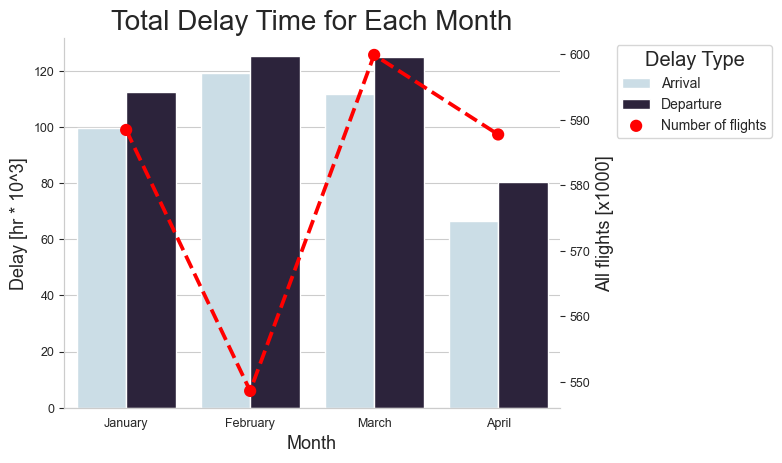

In [16]:
title = "Total Delay Time for Each Month"

dt3 = flights.groupby(["Month"])["DepDelay"].count() / 1000
dt3.name = "All flights [x1000]"
dt3 = dt3.reset_index()

dt1 = flights.groupby(["Month"])["ArrDelay"].sum()
dt1.name = "Delay [hr * 10^3]"
dt1 = dt1.reset_index()
dt1["type"] = "Arrival"
dt1 = pd.merge(dt1, dt3)

dt2 = flights.groupby(["Month"])["DepDelay"].sum()
dt2.name = "Delay [hr * 10^3]"
dt2 = dt2.reset_index()
dt2["type"] = "Departure"
dt2 = pd.merge(dt2, dt3)

dt = pd.merge(dt1, dt2, how="outer")
dt["Delay [hr * 10^3]"] = dt["Delay [hr * 10^3]"] / 60000

fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.barplot(
    dt,
    x="Month",
    y="Delay [hr * 10^3]",
    hue="type",
    palette=sns.color_palette("ch:s=.25,rot=-.25", 2),
)
lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend_.remove()

ax2 = ax1.twinx()
# sns.lineplot(dt, x="Month", y="All flights [x1000]", color="red")
sns.pointplot(
    dt,
    x="Month",
    y="All flights [x1000]",
    color="red",
    linestyles="--",
    label="Number of flights",
)
ax2.yaxis.label.set_size(13)
ax2.set_yticklabels(ax2.get_yticks().astype(np.int64), size=9)
ax2.grid(False)
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc="upper left",
    bbox_to_anchor=(1.1, 1),
    title_fontsize="x-large",
    title="Delay Type",
)
plt.xticks([0, 1, 2, 3], ["January", "February", "March", "April"])
finish(ax1, title)

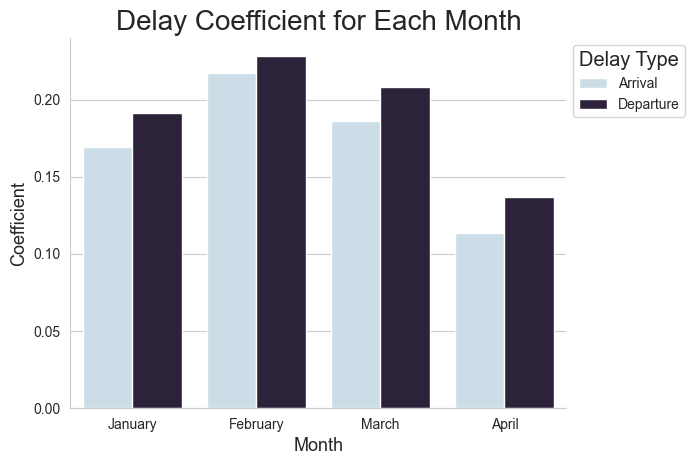

In [17]:
title = "Delay Coefficient for Each Month"

dt["Coefficient"] = dt["Delay [hr * 10^3]"] / dt["All flights [x1000]"]

ax = sns.barplot(
    dt,
    x="Month",
    y="Coefficient",
    hue="type",
    palette=sns.color_palette("ch:s=.25,rot=-.25", 2),
)

plt.xticks([0, 1, 2, 3], ["January", "February", "March", "April"])
plt.legend(
    loc="upper left",
    bbox_to_anchor=(1, 1),
    title_fontsize="x-large",
    title="Delay Type",
)
sns.despine()
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)
plt.title(title, size=20)
save_fig(title)
plt.show()

# ([Delay Time [hr * 10^3] / All flights [x1000])

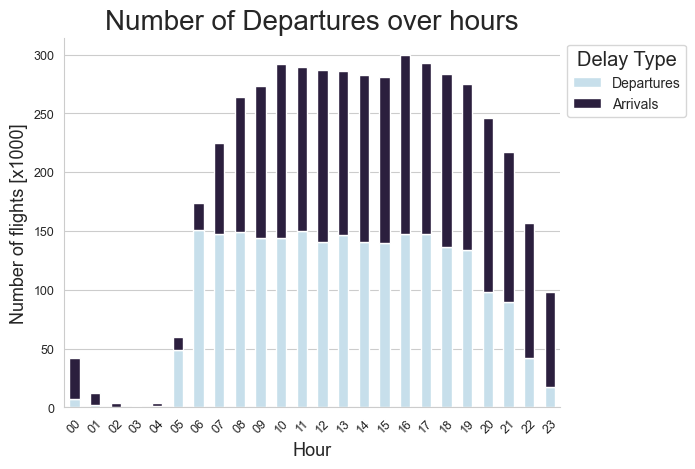

In [18]:
title = "Number of Departures over hours"

dts = []
for name in ["DepTime", "ArrTime"]:
    dt = (
        flights[~pd.isna(flights[name])][name].astype(np.int16).astype(str).str.zfill(4)
    )
    dt[dt == "2400"] = "0000"
    # dt = pd.to_datetime(dt, format="%H%M").dt.strftime("%H")
    dt = dt.str[:2]
    dt = dt.reset_index().groupby(name)["index"].count().sort_values().reset_index()
    dt["index"] /= 1000
    dt = dt.rename(columns={name: "Hour", "index": name})
    dts.append(dt)
dt = pd.merge(*dts)

dt = dt.sort_values("Hour")
dt.index = dt["Hour"]
dt = dt.rename(columns={"DepTime": "Departures", "ArrTime": "Arrivals"})

ax = dt.plot(kind="bar", stacked=True, color=sns.color_palette("ch:s=.25,rot=-.25", 2))

plt.legend(
    loc="upper left",
    bbox_to_anchor=(1, 1),
    title_fontsize="x-large",
    title="Delay Type",
)
plt.xticks(rotation=45)
plt.ylabel("Number of flights [x1000]")
ax.xaxis.grid(False)
finish(ax, title)

# Generating charts for other years

In [19]:
import gc

del flights
gc.collect()

12124

In [ ]:
generate_charts(["1989", "2007"])
gc.collect()
generate_charts(["2000", "2001", "2002"])
gc.collect()
generate_charts(["1990", "1995", "2000", "2005"])
gc.collect()

<Figure size 52000x7800 with 0 Axes>

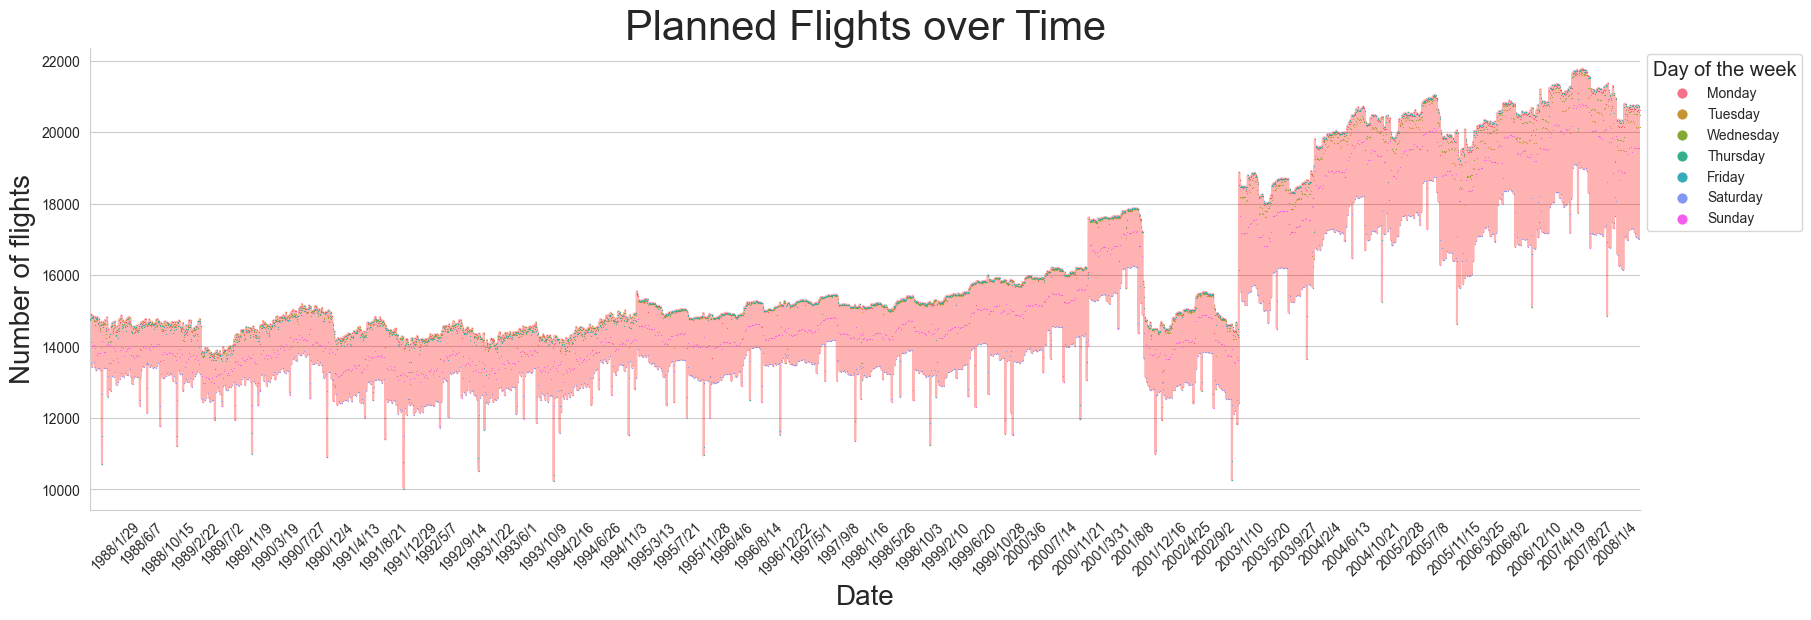

In [21]:
from utils.generate_charts import chart_6

flights = load_flights(cols=["Year", "Month", "DayofMonth", "DayOfWeek"])
chart_6(flights, "plots/all")